# e.g. 14: Compare monthly iso20 climatology from monthly inputs (daily would be too slow with current iso20 function) from 1 control run.

# Similar to e.g. 7 which focused on a forecast run.

# last edited 21 August 2018

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

BEGIN
hostname= oa-35-cdc
this is vm32
Current Working Directory= /OSM/CBR/OA_DCFP/work/col414/cafepp


jupyter_notebook:297: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2.
jupyter_notebook:309: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2.


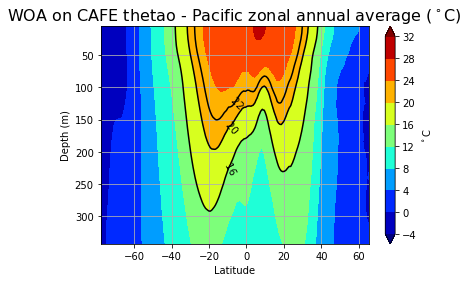

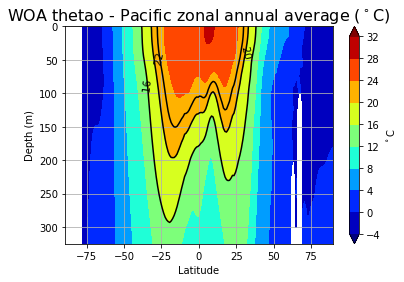

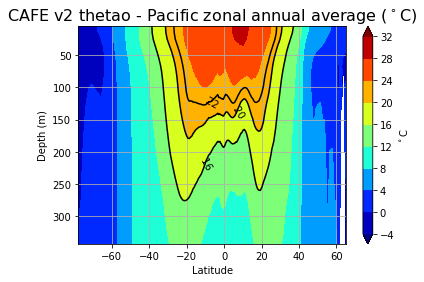

/OSM/CBR/OA_DCFP/apps/col414/anaconda3/envs/cafepp_36_new/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


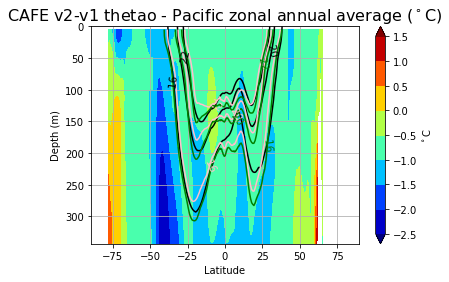

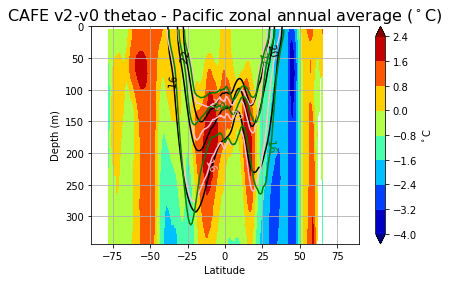

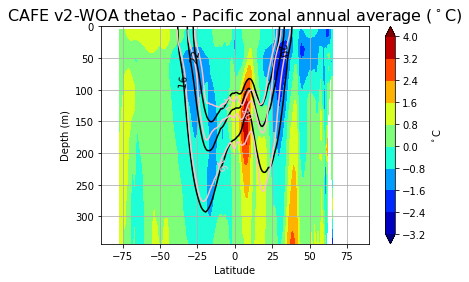

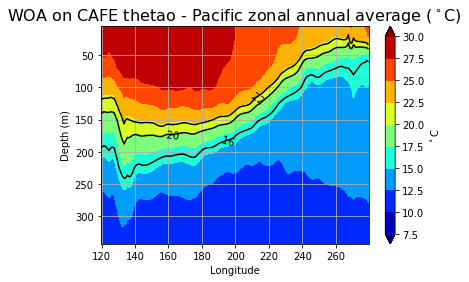

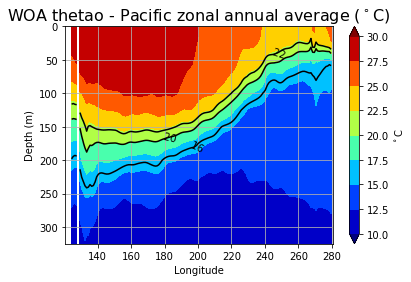

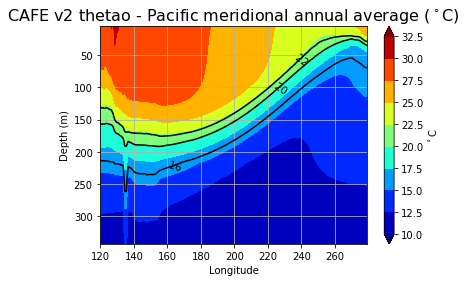

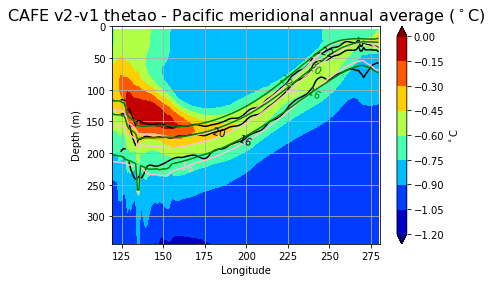

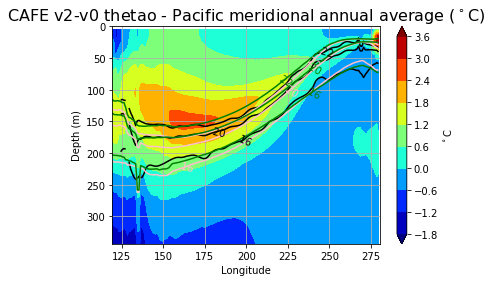

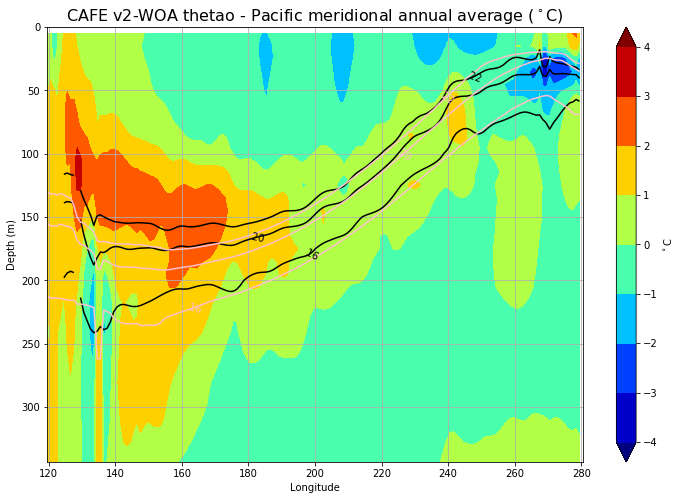

cafe_monthly_files= [['/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/piControl/r1i1p5f1/Omon/t20d/gn/v20171025/t20d_Omon_piControl_CAFE-1-0_r1i1p5f1_gn_047101-048012.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/piControl/r1i1p5f1/Omon/t20d/gn/v20171025/t20d_Omon_piControl_CAFE-1-0_r1i1p5f1_gn_048101-049012.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/piControl/r1i1p5f1/Omon/t20d/gn/v20171025/t20d_Omon_piControl_CAFE-1-0_r1i1p5f1_gn_049101-050012.nc']]
n_data_funcs.init: no ensembles in this example.
calculate_filedatetime_info: case 2: no ensembles, multiple input files.
len(boxes)= 3
boxes= ('wwvP,-5,5,120,280', 'wwvwP,-5,5,120,205', 'wwveP,-5,5,205,280')
 latmin,latmax= [-5.0, -5.0, -5.0] [5.0, 5.0, 5.0]  self.jmin,self.jmax= [121, 121, 121] [152, 152, 152]  lonmin,lonmax= [120.0, 120.0, 205.0] [280.0, 205.0, 280.0]  self.imin,self.imax= [39, 39, 124] [199, 124, 199]  actual: latmin,latmax= [-5.167124271392822 -5.167124271392

FileNotFoundError: [Errno 2] No such file or directory: b'/OSM/CBR/OA_DCFP/data/CAFEPP/g/data/p66/mac599/CMIP5/ancillary_files/grid_spec.auscom.20110618X.nc'

In [3]:
print('BEGIN')

import socket
import re
import os
import pickle
import bz2

hostname=socket.gethostname()

print('hostname=',hostname)

if(re.match('raijin',hostname)):
  print('this is rajin')
  rundir='/short/v14/mac599/cafepp/rundir'
  topdir=''
elif(re.match('oa-3.-cdc',hostname)):
  print('this is vm32')
  rundir='/OSM/CBR/OA_DCFP/work/col414/cafepp'
  topdir='/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6'

os.chdir(rundir)

os.chdir('/OSM/CBR/OA_DCFP/work/col414/cafepp')

print('Current Working Directory=',os.getcwd())

SWITCH_OFF=True #temporary for easy skipping of this section.
SWITCH_OFF=False

if(not SWITCH_OFF):
  
  %matplotlib inline

  __file__='jupyter_notebook' #this can be deleted when written to a python script and loaded as module.

  import sys
  import inspect
  #from decadal_diag import n_data_funcs  
  import cartopy.crs as ccrs
  from cartopy.util import add_cyclic_point
  import numpy as np
  import numpy.ma as ma
  import netCDF4
  from matplotlib.mlab import griddata #need to replace with:
  #from scipy.interpolate import griddata
  
  from decadal_diag import \
    fractional_year_from_num2date, \
    generate_daily_month_indices, \
    shade_2d_latlon, \
    get_timestamp_number, \
    shade_2d_curvilinear, \
    shade_2d_simple, \
    plot_xy, \
    box_indices, \
    plot_box_indices, \
    smooth
  
  from n_data_funcs import n_data_funcs
  
  model='CAFE'
  
  #pval=13
  #pval=9
  #pval=5

  cafe_experiment_titles = {4:'v0_forecast', 1:'v1_forecast', 3:'v2_forecast', 9:'v1', \
    5:'v2', 6:'v3', 7:'aug17p', 2:'v1_assim', 10:'etkf', 11:'nov17n', 12:'jul18b', 13:'v0'}
  
#===============================================================================

#   ifh=netCDF4.Dataset('/OSM/CBR/OA_DCFP/data/CAFEPP/g/data/p66/mac599/CMIP5/ancillary_files/grid_spec.auscom.20110618.nc')
#   area_T = ifh.variables['area_T'][:]
#   wet = ifh.variables['wet'][:]
#   print('area_T.shape=',area_T.shape)
#   print('wet.shape=',wet.shape)

  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#===============================================================================

  cbeg=471
  cend=500
  abeg=471
  aend=500
  
#===============================================================================

#look at temp structure to understand thickness features.
    
##########################

#   cafe_box_indices=box_indices(Diag=True, \
#     boxes=('Pac,-90,90,40,100',), \
#     instance=cafe_monthly_files) #Indian longitudes all latitudes
  
#   latlon_region_string='latlon_region,0,'+str(lev_to_plot)+','+str(cafe_box_indices.jmin[0])+','+str(cafe_box_indices.jmax[0])+','+str(cafe_box_indices.imin[0])+','+str(cafe_box_indices.imax[0])
  
#   print('latlon_region_string=',latlon_region_string)
  
#   cafe_thetao_from_monthly=cafe_monthly_files.calculate_quantity('dummy', Diag=False, quantity=latlon_region_string)
  
#   print('cafe_thetao_from_monthly.shape=',cafe_thetao_from_monthly.shape)

#   cafe_thetao_annual_climatology_from_monthly, cafe_thetao_annual_anomaly_from_monthly=cafe_monthly_files.monthly_clim_anom( \
#     Diag=False, input=cafe_thetao_from_monthly, AnnOut=True, ZeroClim=True, \
#     cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)
  
#   print('cafe_thetao_annual_climatology_from_monthly.shape=',cafe_thetao_annual_climatology_from_monthly.shape)  

#   clevs=None
#   shade_2d_simple(np.average(cafe_thetao_annual_climatology_from_monthly,axis=2), \
#     title='CAFE v1 thetao - Indian zonal annual average', \
#     units='degC', reverse_yaxis=True,
#     xyvals=((cafe_monthly_files.lat[cafe_box_indices.jmin[0]:cafe_box_indices.jmax[0]+1],cafe_monthly_files.lev[0:lev_to_plot+1])), \
#     xysize=(12,8), xlab='Latitude', ylab='Depth (m)', grid=True, cmap='jet', clevs=clevs, n_contour=[16,20,22])
  
##########################

#   cafe_box_indices=box_indices(Diag=True, \
#     boxes=('Pac,-2,2,40,100',), \
#     instance=cafe_monthly_files) #Indian along equator
    
#   latlon_region_string='latlon_region,0,'+str(lev_to_plot)+','+str(cafe_box_indices.jmin[0])+','+str(cafe_box_indices.jmax[0])+','+str(cafe_box_indices.imin[0])+','+str(cafe_box_indices.imax[0])
  
#   print('latlon_region_string=',latlon_region_string)
  
#   cafe_thetao_from_monthly=cafe_monthly_files.calculate_quantity('dummy', Diag=False, quantity=latlon_region_string)
  
#   print('cafe_thetao_from_monthly.shape=',cafe_thetao_from_monthly.shape)

#   cafe_thetao_annual_climatology_from_monthly, cafe_thetao_annual_anomaly_from_monthly=cafe_monthly_files.monthly_clim_anom( \
#     Diag=False, input=cafe_thetao_from_monthly, AnnOut=True, ZeroClim=True, \
#     cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)
  
#   print('cafe_thetao_annual_climatology_from_monthly.shape=',cafe_thetao_annual_climatology_from_monthly.shape)
  
#   step=2;clevs=sorted(list(set(np.arange(10, 30+step, step).tolist())))
#   shade_2d_simple(np.average(cafe_thetao_annual_climatology_from_monthly,axis=1), \
#     title='CAFE v1 thetao - Indian meridional annual average', \
#     units='degC', reverse_yaxis=True,
#     xyvals=((cafe_monthly_files.lon[cafe_box_indices.imin[0]:cafe_box_indices.imax[0]+1],cafe_monthly_files.lev[0:lev_to_plot+1])), \
#     xysize=(12,8), xlab='Longitude', ylab='Depth (m)', grid=True, cmap='jet', clevs=clevs, n_contour=[16,20,22])
 
##########################

  depth_to_plot=350.

#WOA

  model='WOA1x1'

  idir_woa='/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/woa'
  ifil_woa=idir_woa+'/'+'woa13_95A4_t00_01v2.nc'

  ifh = netCDF4.Dataset(ifil_woa)

  data = np.roll(np.squeeze(ifh.variables['t_an']),180,axis=2)

  woa_depths = ifh.variables['depth'][:]
  woa_lons = ifh.variables['lon'][:]
  woa_lats = ifh.variables['lat'][:]
  
  woa_lons = np.where(woa_lons<0,woa_lons+360,woa_lons)
  woa_lons = np.roll(woa_lons,180)

  woa_ndepths = woa_depths.size
  woa_nlons = woa_lons.size
  woa_nlats = woa_lats.size
  
  woa_lev_to_plot=np.abs(woa_depths[:] - depth_to_plot).argmin()
  
#need to know lats to use for equator, as well as lons that cover pacific 120-280.
#   print(lons[120])
#   print(lons[280])
#   print(lats[89])
#   print(lats[90])

  #print(woa_lats[:])
  
  woa_imin=120
  woa_imax=280
  woa_jmin=89
  woa_jmax=90
  
  data=ma.masked_greater_equal(data,1e20)
  woa_thetao_mpac=np.average(data[:,woa_jmin:woa_jmax+1,:],axis=1)
  woa_thetao_zpac=np.average(data[:,:,woa_imin:woa_imax+1],axis=2)
  
  #print(data)
  #print(woa_thetao_mpac)
  
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

  Clobber=True
  Clobber=False

  pvals=[13,9,5] #v0, v1, v2

  thetao_clim_mpac_plot,thetao_clim_zpac_plot = (),()
  
  #print(type(thetao_clim_mpac_plot))
  
  for pval in pvals:
    
    input_pkl=cafe_experiment_titles[pval]+'_mzpac.pkl'
    
    if(Clobber): os.remove(input_pkl)

    if(os.path.exists(input_pkl)):
      pickling_in = bz2.BZ2File(input_pkl, "rb")
      thetao_clim_mpac, thetao_clim_zpac, lat_zpac, lon_zpac, lev_zpac, lat_mpac, lon_mpac, lev_mpac \
      = pickle.load(pickling_in)
      pickling_in.close()

    else:

      ivar_str_cafe='thetao';offset=0.0;scale=1.0;long_name='thetao';short_name='thetao';units='degC';table='Omon'
      cafe_monthly_files,cafe_monthly_files_flat=[],[]
      for ensemble in range(1,1+1):
        cafe_inner_monthly_files=[]
        idir=topdir+'/'+'CMIP6/CMIP/CSIRO/CAFE-1-0/piControl/r'+str(ensemble)+'i1p'+str(pval)+'f1/'+table+'/'+ivar_str_cafe+'/gn/v20171025'
        monthly_ifils=[ivar_str_cafe+'_'+table+'_piControl_CAFE-1-0_r'+str(ensemble)+'i1p'+str(pval)+'f1_gn_047101-048012.nc', \
                       ivar_str_cafe+'_'+table+'_piControl_CAFE-1-0_r'+str(ensemble)+'i1p'+str(pval)+'f1_gn_048101-049012.nc', \
                       ivar_str_cafe+'_'+table+'_piControl_CAFE-1-0_r'+str(ensemble)+'i1p'+str(pval)+'f1_gn_049101-050012.nc'] #1 file
        for file in monthly_ifils:
          if(not os.path.exists(idir+'/'+file)):
            raise SystemExit(idir+'/'+file+' doesnt exist:'+__file__+' line number: '+str(inspect.stack()[0][2]))
          else:
            cafe_inner_monthly_files.append(idir+'/'+file)
        cafe_monthly_files.append(cafe_inner_monthly_files)
      print('cafe_monthly_files=',cafe_monthly_files)

      #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

      cafe_monthly_files=n_data_funcs(input_files=cafe_monthly_files,input_var_name=ivar_str_cafe)

      cafe_monthly_files.calculate_filedatetime_info(Diag=False,calendar='noleap')

      cafe_monthly_files.get_latlon_info(Diag=False,lat='latitude',lon='longitude')

      cafe_monthly_files.get_lev_info()
      
      #print(cafe_monthly_files.lev[:])
      
      cafe_lev_to_plot=np.abs(cafe_monthly_files.lev[:] - depth_to_plot).argmin()
      
      #print(cafe_lev_to_plot)

      #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

        
      cafe_box_indices=box_indices(Diag=True, \
        boxes=('Pac,-90,90,120,280',), \
        instance=cafe_monthly_files) #Pacific longitudes all latitudes

      latlon_region_string='latlon_region,0,'+str(cafe_lev_to_plot)+','+str(cafe_box_indices.jmin[0])+','+str(cafe_box_indices.jmax[0])+','+str(cafe_box_indices.imin[0])+','+str(cafe_box_indices.imax[0])

      print('latlon_region_string=',latlon_region_string)

      cafe_thetao_from_monthly=cafe_monthly_files.calculate_quantity('dummy', Diag=False, quantity=latlon_region_string)

      print('cafe_thetao_from_monthly.shape=',cafe_thetao_from_monthly.shape)

      cafe_thetao_annual_climatology_from_monthly_zpac, cafe_thetao_annual_anomaly_from_monthly_zpac=cafe_monthly_files.monthly_clim_anom( \
        Diag=False, input=cafe_thetao_from_monthly, AnnOut=True, ZeroClim=True, \
        cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)

      thetao_clim_zpac=cafe_thetao_annual_climatology_from_monthly_zpac
      lat_zpac=cafe_monthly_files.lat[cafe_box_indices.jmin[0]:cafe_box_indices.jmax[0]+1]
      lon_zpac=cafe_monthly_files.lon[cafe_box_indices.imin[0]:cafe_box_indices.imax[0]+1]
      lev_zpac=cafe_monthly_files.lev[0:cafe_lev_to_plot+1]

      print('cafe_thetao_annual_climatology_from_monthly_zpac.shape=',cafe_thetao_annual_climatology_from_monthly_zpac.shape)  

  ##########################

      cafe_box_indices=box_indices(Diag=True, \
        boxes=('Pac,-2,2,120,280',), \
        instance=cafe_monthly_files) #Pacific along equator

      latlon_region_string='latlon_region,0,'+str(cafe_lev_to_plot)+','+str(cafe_box_indices.jmin[0])+','+str(cafe_box_indices.jmax[0])+','+str(cafe_box_indices.imin[0])+','+str(cafe_box_indices.imax[0])

      print('latlon_region_string=',latlon_region_string)

      cafe_thetao_from_monthly=cafe_monthly_files.calculate_quantity('dummy', Diag=False, quantity=latlon_region_string)

      print('cafe_thetao_from_monthly.shape=',cafe_thetao_from_monthly.shape)

      cafe_thetao_annual_climatology_from_monthly_mpac, cafe_thetao_annual_anomaly_from_monthly_mpac=cafe_monthly_files.monthly_clim_anom( \
        Diag=False, input=cafe_thetao_from_monthly, AnnOut=True, ZeroClim=True, \
        cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)

      print('cafe_thetao_annual_climatology_from_monthly_mpac.shape=',cafe_thetao_annual_climatology_from_monthly_mpac.shape)

      thetao_clim_mpac=cafe_thetao_annual_climatology_from_monthly_mpac
      lat_mpac=cafe_monthly_files.lat[cafe_box_indices.jmin[0]:cafe_box_indices.jmax[0]+1]
      lon_mpac=cafe_monthly_files.lon[cafe_box_indices.imin[0]:cafe_box_indices.imax[0]+1]
      lev_mpac=cafe_monthly_files.lev[0:cafe_lev_to_plot+1]

      pkl_objects=(thetao_clim_mpac, thetao_clim_zpac, \
        lat_zpac, lon_zpac, lev_zpac, lat_mpac, lon_mpac, lev_mpac)

      pickling_out = bz2.BZ2File(input_pkl, "wb")
      pickle.dump( pkl_objects, pickling_out, protocol=4)
      pickling_out.close()
      
    thetao_clim_mpac_plot = thetao_clim_mpac_plot + (thetao_clim_mpac,)
    thetao_clim_zpac_plot = thetao_clim_zpac_plot + (thetao_clim_zpac,)
      
  #print(thetao_clim_mpac_plot)
  #print(len(thetao_clim_mpac_plot))
  
  
  woa_lats2d_tmp=np.expand_dims(woa_lats,0)
  woa_lats2df=np.tile(woa_lats2d_tmp, (woa_ndepths,1)).flatten()
  woa_depths2d_tmp=np.expand_dims(woa_depths,1)
  woa_depths2df=np.tile(woa_depths2d_tmp, (1,woa_nlats)).flatten()
  woa_thetao_zpac_on_cafe = griddata(woa_lats2df, woa_depths2df, woa_thetao_zpac.flatten(), lat_zpac, lev_zpac, interp='linear')
  
  #woa_thetao_zpac_on_cafe = griddata((woa_lats,woa_depths),)
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

  
  #print(woa_lats2df.shape,woa_depths2df.shape,woa_thetao_zpac.shape)
  
  woa_lons2d_tmp=np.expand_dims(woa_lons,0)
  woa_lons2df=np.tile(woa_lons2d_tmp, (woa_ndepths,1)).flatten()
  woa_depths2d_tmp=np.expand_dims(woa_depths,1)
  woa_depths2df=np.tile(woa_depths2d_tmp, (1,woa_nlons)).flatten()
  woa_thetao_mpac_on_cafe = griddata(woa_lons2df, woa_depths2df, woa_thetao_mpac.flatten(), lon_mpac, lev_mpac, interp='linear')
  
  clevs=None
  
#   print(woa_thetao_mpac.shape)
#   print(woa_lons.shape)
#   print(woa_depths.shape)
  
  #fuck
  #step=5;clevs=sorted(list(set(np.arange(0, 30+step, step).tolist())))

  ###
  #zonal
  
  shade_2d_simple(woa_thetao_zpac_on_cafe, \
    title='WOA on CAFE thetao - Pacific zonal annual average', \
    units='$^\circ$C', reverse_yaxis=True, \
    xyvals=((lat_zpac, lev_zpac)), \
    xysize=(6,4), xlab='Latitude', ylab='Depth (m)', grid=True, cmap='jet', clevs=clevs, n_contour=[16,20,22])
  
  shade_2d_simple(woa_thetao_zpac[0:woa_lev_to_plot,:], \
    title='WOA thetao - Pacific zonal annual average', \
    units='$^\circ$C', reverse_yaxis=True, \
    xyvals=((woa_lats, woa_depths[0:woa_lev_to_plot])), \
    xysize=(6,4), xlab='Latitude', ylab='Depth (m)', grid=True, cmap='jet', clevs=clevs, n_contour=[16,20,22])
  
  shade_2d_simple(np.average(thetao_clim_zpac_plot[2],axis=2), \
    title='CAFE v2 thetao - Pacific zonal annual average', \
    units='$^\circ$C', reverse_yaxis=True, \
    xyvals=((lat_zpac, lev_zpac)), \
    xysize=(6,4), xlab='Latitude', ylab='Depth (m)', grid=True, cmap='jet', clevs=clevs, n_contour=[16,20,22])
  
  shade_2d_simple(np.average(thetao_clim_zpac_plot[2],axis=2)-np.average(thetao_clim_zpac_plot[1],axis=2), \
    title='CAFE v2-v1 thetao - Pacific zonal annual average', \
    units='$^\circ$C', reverse_yaxis=True, \
    xyvals=((lat_zpac, lev_zpac)), \
    xysize=(6,4), xlab='Latitude', ylab='Depth (m)', grid=True, cmap='jet', clevs=clevs, n_contour=[16,20,22], \
    contour_arrays=((woa_lats, woa_depths[0:woa_lev_to_plot], woa_thetao_zpac[0:woa_lev_to_plot,:]), (lat_zpac, lev_zpac, np.average(thetao_clim_zpac_plot[2],axis=2)), (lat_zpac, lev_zpac, np.average(thetao_clim_zpac_plot[1],axis=2))) )
  
  shade_2d_simple(np.average(thetao_clim_zpac_plot[2],axis=2)-np.average(thetao_clim_zpac_plot[0],axis=2), \
    title='CAFE v2-v0 thetao - Pacific zonal annual average', \
    units='$^\circ$C', reverse_yaxis=True, \
    xyvals=((lat_zpac, lev_zpac)), \
    xysize=(6,4), xlab='Latitude', ylab='Depth (m)', grid=True, cmap='jet', clevs=clevs, n_contour=[16,20,22], \
    contour_arrays=((woa_lats, woa_depths[0:woa_lev_to_plot], woa_thetao_zpac[0:woa_lev_to_plot,:]), (lat_zpac, lev_zpac, np.average(thetao_clim_zpac_plot[2],axis=2)), (lat_zpac, lev_zpac, np.average(thetao_clim_zpac_plot[0],axis=2))) )

  shade_2d_simple(np.average(thetao_clim_zpac_plot[2],axis=2)-woa_thetao_zpac_on_cafe, \
    title='CAFE v2-WOA thetao - Pacific zonal annual average', \
    units='$^\circ$C', reverse_yaxis=True, \
    xyvals=((lat_zpac, lev_zpac)), \
    xysize=(6,4), xlab='Latitude', ylab='Depth (m)', grid=True, cmap='jet', clevs=clevs, n_contour=[16,20,22], \
    contour_arrays=((woa_lats, woa_depths[0:woa_lev_to_plot], woa_thetao_zpac[0:woa_lev_to_plot,:]), (lat_zpac, lev_zpac, np.average(thetao_clim_zpac_plot[2],axis=2)) ))
  
  ###
  #meridional
  
  shade_2d_simple(woa_thetao_mpac_on_cafe, \
    title='WOA on CAFE thetao - Pacific zonal annual average', \
    units='$^\circ$C', reverse_yaxis=True, \
    xyvals=((lon_mpac, lev_mpac)), \
    xysize=(6,4), xlab='Longitude', ylab='Depth (m)', grid=True, cmap='jet', clevs=clevs, n_contour=[16,20,22])
  
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

  shade_2d_simple(woa_thetao_mpac[0:woa_lev_to_plot,woa_imin:woa_imax+1], \
    title='WOA thetao - Pacific zonal annual average', \
    units='$^\circ$C', reverse_yaxis=True, \
    xyvals=((woa_lons[woa_imin:woa_imax+1], woa_depths[0:woa_lev_to_plot])), \
    xysize=(6,4), xlab='Longitude', ylab='Depth (m)', grid=True, cmap='jet', clevs=clevs, n_contour=[16,20,22])
  
  #step=2;clevs=sorted(list(set(np.arange(10, 30+step, step).tolist())))
  shade_2d_simple(np.average(thetao_clim_mpac_plot[2],axis=1), \
    title='CAFE v2 thetao - Pacific meridional annual average', \
    units='$^\circ$C', reverse_yaxis=True, \
    xyvals=((lon_mpac, lev_mpac)), \
    xysize=(6,4), xlab='Longitude', ylab='Depth (m)', grid=True, cmap='jet', clevs=clevs, n_contour=[16,20,22])
  
  #step=2;clevs=sorted(list(set(np.arange(10, 30+step, step).tolist())))
  shade_2d_simple(np.average(thetao_clim_mpac_plot[2],axis=1)-np.average(thetao_clim_mpac_plot[1],axis=1), \
    title='CAFE v2-v1 thetao - Pacific meridional annual average', \
    units='$^\circ$C', reverse_yaxis=True, \
    xyvals=((lon_mpac, lev_mpac)), \
    xysize=(6,4), xlab='Longitude', ylab='Depth (m)', grid=True, cmap='jet', clevs=clevs, n_contour=[16,20,22], \
    contour_arrays=((woa_lons[woa_imin:woa_imax+1], woa_depths[0:woa_lev_to_plot], woa_thetao_mpac[0:woa_lev_to_plot,woa_imin:woa_imax+1]), (lon_mpac, lev_mpac, np.average(thetao_clim_mpac_plot[2],axis=1)), (lon_mpac, lev_mpac, np.average(thetao_clim_mpac_plot[0],axis=1))) )
    
  shade_2d_simple(np.average(thetao_clim_mpac_plot[2],axis=1)-np.average(thetao_clim_mpac_plot[0],axis=1), \
    title='CAFE v2-v0 thetao - Pacific meridional annual average', \
    units='$^\circ$C', reverse_yaxis=True, \
    xyvals=((lon_mpac, lev_mpac)), \
    xysize=(6,4), xlab='Longitude', ylab='Depth (m)', grid=True, cmap='jet', clevs=clevs, n_contour=[16,20,22], \
    contour_arrays=((woa_lons[woa_imin:woa_imax+1], woa_depths[0:woa_lev_to_plot], woa_thetao_mpac[0:woa_lev_to_plot,woa_imin:woa_imax+1]), (lon_mpac, lev_mpac, np.average(thetao_clim_mpac_plot[2],axis=1)), (lon_mpac, lev_mpac, np.average(thetao_clim_mpac_plot[0],axis=1))) )
  
  shade_2d_simple(np.average(thetao_clim_mpac_plot[2],axis=1)-woa_thetao_mpac_on_cafe, \
    title='CAFE v2-WOA thetao - Pacific meridional annual average', \
    units='$^\circ$C', reverse_yaxis=True, \
    xyvals=((lon_mpac, lev_mpac)), \
    xysize=(12,8), xlab='Longitude', ylab='Depth (m)', grid=True, cmap='jet', clevs=clevs, n_contour=[16,20,22], \
    contour_arrays=((woa_lons[woa_imin:woa_imax+1], woa_depths[0:woa_lev_to_plot], woa_thetao_mpac[0:woa_lev_to_plot,woa_imin:woa_imax+1]), (lon_mpac, lev_mpac, np.average(thetao_clim_mpac_plot[2],axis=1)) ))
  
  
##########################
  
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#===============================================================================
#create new quantity wwv

  cbeg=471
  cend=500
  abeg=471
  aend=500

#CMIP6/CMIP/CSIRO/CAFE-1-0/piControl/r1i1p13f1/Omon/t22d/gn/v20171025/t22d_Omon_piControl_CAFE-1-0_r1i1p13f1_gn_047001-050012.nc

  ivar_str_cafe='t20d';offset=0.0;scale=1.0;long_name='t20d';short_name='t20d';units='m';table='Omon'
  cafe_monthly_files,cafe_monthly_files_flat=[],[]
  for ensemble in range(1,1+1):
    cafe_inner_monthly_files=[]
    idir=topdir+'/'+'CMIP6/CMIP/CSIRO/CAFE-1-0/piControl/r'+str(ensemble)+'i1p'+str(pval)+'f1/'+table+'/'+ivar_str_cafe+'/gn/v20171025'
    monthly_ifils=[ivar_str_cafe+'_'+table+'_piControl_CAFE-1-0_r'+str(ensemble)+'i1p'+str(pval)+'f1_gn_047101-048012.nc', \
                   ivar_str_cafe+'_'+table+'_piControl_CAFE-1-0_r'+str(ensemble)+'i1p'+str(pval)+'f1_gn_048101-049012.nc', \
                   ivar_str_cafe+'_'+table+'_piControl_CAFE-1-0_r'+str(ensemble)+'i1p'+str(pval)+'f1_gn_049101-050012.nc']
    for file in monthly_ifils:
      if(not os.path.exists(idir+'/'+file)):
        raise SystemExit(idir+'/'+file+' doesnt exist:'+__file__+' line number: '+str(inspect.stack()[0][2]))
      else:
        cafe_inner_monthly_files.append(idir+'/'+file)
    cafe_monthly_files.append(cafe_inner_monthly_files)
  print('cafe_monthly_files=',cafe_monthly_files)
  
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

  cafe_monthly_files=n_data_funcs(input_files=cafe_monthly_files,input_var_name=ivar_str_cafe)
  
  cafe_monthly_files.calculate_filedatetime_info(Diag=False,calendar='noleap')
  
  cafe_monthly_files.get_latlon_info(Diag=False,lat='latitude',lon='longitude')
    
  cafe_box_indices=box_indices(Diag=True, \
    boxes=('wwvP,-5,5,120,280','wwvwP,-5,5,120,205','wwveP,-5,5,205,280'), \
    instance=cafe_monthly_files)
  
  cafe_wwv_from_monthly=cafe_monthly_files.calculate_quantity(cafe_box_indices, Diag=False, quantity='wwv,/OSM/CBR/OA_DCFP/data/CAFEPP/g/data/p66/mac599/CMIP5/ancillary_files/grid_spec.auscom.20110618.nc')
  
  print('cafe_wwv_from_monthly.shape=',cafe_wwv_from_monthly.shape)
  
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

  cafe_wwv_annual_climatology_from_monthly, cafe_wwv_annual_anomaly_from_monthly=cafe_monthly_files.monthly_clim_anom( \
    Diag=False, input=cafe_wwv_from_monthly, AnnOut=False, ZeroClim=True, \
    cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)
  
  print('cafe_wwv_annual_climatology_from_monthly.shape=',cafe_wwv_annual_climatology_from_monthly.shape)
  print('cafe_wwv_annual_anomaly_from_monthly.shape=',cafe_wwv_annual_anomaly_from_monthly.shape)
  
  plot_box_indices(latmin=cafe_box_indices.latmin,latmax=cafe_box_indices.latmax,lonmin=cafe_box_indices.lonmin,lonmax=cafe_box_indices.lonmax,labs=cafe_box_indices.boxes_labs, \
    colors=['red','blue','green'])

  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

  input_datas = (cafe_wwv_annual_anomaly_from_monthly[:,0]/1e14,)
  input_datas = input_datas + (cafe_wwv_annual_anomaly_from_monthly[:,1]/1e14,)
  input_datas = input_datas + (cafe_wwv_annual_anomaly_from_monthly[:,2]/1e14,)

  input_xvals = (cafe_monthly_files.year_fraction_anomaly,)
  input_xvals = input_xvals + (cafe_monthly_files.year_fraction_anomaly,)
  input_xvals = input_xvals + (cafe_monthly_files.year_fraction_anomaly,)
  
  plot_xy(Diag=False, input_data=input_datas, input_xvals=input_xvals, \
    title='CAFE '+cafe_experiment_titles[pval], \
    units='m3 * 1e14', \
    xlab='Year', \
    ylab='WWV', \
    zero2=False, \
    reverse_xaxis=False, \
    reverse_yaxis=False, \
    xysize=(16,8), \
    line_colors=['red','blue','green'], \
    line_labels=cafe_box_indices.boxes_labs[0:3], grid=True \
    )
  
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#===============================================================================
#create new quantity z20

  ivar_str_cafe='t20d';offset=0.0;scale=1.0;long_name='t20d';short_name='t20d';units='m';table='Omon'
  cafe_monthly_files,cafe_monthly_files_flat=[],[]
  for ensemble in range(1,1+1):
    cafe_inner_monthly_files=[]
    idir=topdir+'/'+'CMIP6/CMIP/CSIRO/CAFE-1-0/piControl/r'+str(ensemble)+'i1p'+str(pval)+'f1/'+table+'/'+ivar_str_cafe+'/gn/v20171025'
    monthly_ifils=[ivar_str_cafe+'_'+table+'_piControl_CAFE-1-0_r'+str(ensemble)+'i1p'+str(pval)+'f1_gn_047101-048012.nc', \
                   ivar_str_cafe+'_'+table+'_piControl_CAFE-1-0_r'+str(ensemble)+'i1p'+str(pval)+'f1_gn_048101-049012.nc', \
                   ivar_str_cafe+'_'+table+'_piControl_CAFE-1-0_r'+str(ensemble)+'i1p'+str(pval)+'f1_gn_049101-050012.nc']
    for file in monthly_ifils:
      if(not os.path.exists(idir+'/'+file)):
        raise SystemExit(idir+'/'+file+' doesnt exist:'+__file__+' line number: '+str(inspect.stack()[0][2]))
      else:
        cafe_inner_monthly_files.append(idir+'/'+file)
    cafe_monthly_files.append(cafe_inner_monthly_files)
  print('cafe_monthly_files=',cafe_monthly_files)
  
  cafe_monthly_files=n_data_funcs(input_files=cafe_monthly_files,input_var_name=ivar_str_cafe)
  
  cafe_monthly_files.calculate_filedatetime_info(Diag=False,calendar='noleap')
  
  cafe_monthly_files.get_latlon_info(Diag=False,lat='latitude',lon='longitude')
  
  #cafe_box_indices=box_indices(Diag=True, boxes=('laba,131,143,40,140','labb,131,143,40,140'))
  
  cafe_box_indices=box_indices(Diag=True, \
    boxes=('z20P,-2,2,120,280','z20wP,-2,2,120,205','z20eP,-2,2,205,280','z20I,-2,2,40,100','z20wI,-2,2,40,70','z20eI,-2,2,70,100'), \
    instance=cafe_monthly_files)
  
  #print('aaa')
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))
  
  cafe_z20_from_monthly=cafe_monthly_files.calculate_quantity(cafe_box_indices, Diag=False, quantity='z20')
  
  print('cafe_z20_from_monthly.shape=',cafe_z20_from_monthly.shape)
  
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

  cafe_z20_annual_climatology_from_monthly, cafe_z20_annual_anomaly_from_monthly=cafe_monthly_files.monthly_clim_anom( \
    Diag=False, input=cafe_z20_from_monthly, AnnOut=False, ZeroClim=True, \
    cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)
  
  print('cafe_z20_annual_climatology_from_monthly.shape=',cafe_z20_annual_climatology_from_monthly.shape)
  print('cafe_z20_annual_anomaly_from_monthly.shape=',cafe_z20_annual_anomaly_from_monthly.shape)
  
  plot_box_indices(latmin=cafe_box_indices.latmin,latmax=cafe_box_indices.latmax,lonmin=cafe_box_indices.lonmin,lonmax=cafe_box_indices.lonmax,labs=cafe_box_indices.boxes_labs, \
    colors=['red','blue','green','red','blue','green'])
  
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

  input_datas = (cafe_z20_annual_anomaly_from_monthly[:,0],)
  input_datas = input_datas + (cafe_z20_annual_anomaly_from_monthly[:,1],)
  input_datas = input_datas + (cafe_z20_annual_anomaly_from_monthly[:,2],)

  input_xvals = (cafe_monthly_files.year_fraction_anomaly,)
  input_xvals = input_xvals + (cafe_monthly_files.year_fraction_anomaly,)
  input_xvals = input_xvals + (cafe_monthly_files.year_fraction_anomaly,)
  
  plot_xy(Diag=False, input_data=input_datas, input_xvals=input_xvals, \
    title='CAFE '+cafe_experiment_titles[pval], \
    units='m', \
    xlab='Year', \
    ylab='z20 Pacific', \
    zero2=False, \
    reverse_xaxis=False, \
    reverse_yaxis=False, \
    xysize=(16,8), \
    line_colors=['red','blue','green'], \
    line_labels=cafe_box_indices.boxes_labs[0:3], grid=True \
    )

  input_datas = (cafe_z20_annual_anomaly_from_monthly[:,3],)
  input_datas = input_datas + (cafe_z20_annual_anomaly_from_monthly[:,4],)
  input_datas = input_datas + (cafe_z20_annual_anomaly_from_monthly[:,5],)

  input_xvals = (cafe_monthly_files.year_fraction_anomaly,)
  input_xvals = input_xvals + (cafe_monthly_files.year_fraction_anomaly,)
  input_xvals = input_xvals + (cafe_monthly_files.year_fraction_anomaly,)
  
  plot_xy(Diag=False, input_data=input_datas, input_xvals=input_xvals, \
    title='CAFE '+cafe_experiment_titles[pval], \
    units='m', \
    xlab='Year', \
    ylab='z20 Indian', \
    zero2=False, \
    reverse_xaxis=False, \
    reverse_yaxis=False, \
    xysize=(16,8), \
    line_colors=['red','blue','green'], \
    line_labels=cafe_box_indices.boxes_labs[3:6], grid=True \
    )
  
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#===============================================================================

  ivar_str_cafe='t16d';offset=0.0;scale=1.0;long_name='t16d';short_name='t16d';units='m';table='Omon'
  cafe_monthly_files,cafe_monthly_files_flat=[],[]
  for ensemble in range(1,1+1):
    cafe_inner_monthly_files=[]
    idir=topdir+'/'+'CMIP6/CMIP/CSIRO/CAFE-1-0/piControl/r'+str(ensemble)+'i1p'+str(pval)+'f1/'+table+'/'+ivar_str_cafe+'/gn/v20171025'
    monthly_ifils=[ivar_str_cafe+'_'+table+'_piControl_CAFE-1-0_r'+str(ensemble)+'i1p'+str(pval)+'f1_gn_047101-048012.nc', \
                  ivar_str_cafe+'_'+table+'_piControl_CAFE-1-0_r'+str(ensemble)+'i1p'+str(pval)+'f1_gn_048101-049012.nc', \
                  ivar_str_cafe+'_'+table+'_piControl_CAFE-1-0_r'+str(ensemble)+'i1p'+str(pval)+'f1_gn_049101-050012.nc']
    for file in monthly_ifils:
      if(not os.path.exists(idir+'/'+file)):
        raise SystemExit(idir+'/'+file+' doesnt exist:'+__file__+' line number: '+str(inspect.stack()[0][2]))
      else:
        cafe_inner_monthly_files.append(idir+'/'+file)
    cafe_monthly_files.append(cafe_inner_monthly_files)
  print('cafe_monthly_files=',cafe_monthly_files)
  
  cafe_monthly_files=n_data_funcs(input_files=cafe_monthly_files,input_var_name=ivar_str_cafe)
  
  cafe_monthly_files.calculate_filedatetime_info(Diag=False,calendar='noleap')
  
  cafe_monthly_files.get_latlon_info(Diag=False,lat='latitude',lon='longitude')
  
  cafe_t16d_from_monthly=cafe_monthly_files.calculate_quantity('dummy',Diag=False,quantity='latlon_region,0,299,0,359')
  
  cafe_t16d_annual_climatology_from_monthly, cafe_t16d_annual_anomaly_from_monthly=cafe_monthly_files.monthly_clim_anom( \
    Diag=False, input=cafe_t16d_from_monthly, AnnOut=False, ZeroClim=True, \
    cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)
  
  print('cafe_t16d_annual_climatology_from_monthly.shape=',cafe_t16d_annual_climatology_from_monthly.shape)
  print('cafe_t16d_annual_anomaly_from_monthly.shape=',cafe_t16d_annual_anomaly_from_monthly.shape)
  
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))
  
#===============================================================================

  ivar_str_cafe='t20d';offset=0.0;scale=1.0;long_name='t20d';short_name='t20d';units='m';table='Omon'
  cafe_monthly_files,cafe_monthly_files_flat=[],[]
  for ensemble in range(1,1+1):
    cafe_inner_monthly_files=[]
    idir=topdir+'/'+'CMIP6/CMIP/CSIRO/CAFE-1-0/piControl/r'+str(ensemble)+'i1p'+str(pval)+'f1/'+table+'/'+ivar_str_cafe+'/gn/v20171025'
    monthly_ifils=[ivar_str_cafe+'_'+table+'_piControl_CAFE-1-0_r'+str(ensemble)+'i1p'+str(pval)+'f1_gn_047101-048012.nc',
                  ivar_str_cafe+'_'+table+'_piControl_CAFE-1-0_r'+str(ensemble)+'i1p'+str(pval)+'f1_gn_048101-049012.nc',
                  ivar_str_cafe+'_'+table+'_piControl_CAFE-1-0_r'+str(ensemble)+'i1p'+str(pval)+'f1_gn_049101-050012.nc']
    for file in monthly_ifils:
      if(not os.path.exists(idir+'/'+file)):
        raise SystemExit(idir+'/'+file+' doesnt exist:'+__file__+' line number: '+str(inspect.stack()[0][2]))
      else:
        cafe_inner_monthly_files.append(idir+'/'+file)
    cafe_monthly_files.append(cafe_inner_monthly_files)
  print('cafe_monthly_files=',cafe_monthly_files)
  
  cafe_monthly_files=n_data_funcs(input_files=cafe_monthly_files,input_var_name=ivar_str_cafe)
  
  cafe_monthly_files.calculate_filedatetime_info(Diag=False,calendar='noleap')
  
  cafe_monthly_files.get_latlon_info(Diag=False,lat='latitude',lon='longitude')
  
  cafe_t20d_from_monthly=cafe_monthly_files.calculate_quantity('dummy',Diag=False,quantity='latlon_region,0,299,0,359')
  
  cafe_t20d_annual_climatology_from_monthly, cafe_t20d_annual_anomaly_from_monthly=cafe_monthly_files.monthly_clim_anom( \
    Diag=False, input=cafe_t20d_from_monthly, AnnOut=False, ZeroClim=True, \
    cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)
  print('cafe_t20d_annual_climatology_from_monthly.shape=',cafe_t20d_annual_climatology_from_monthly.shape)
  print('cafe_t20d_annual_anomaly_from_monthly.shape=',cafe_t20d_annual_anomaly_from_monthly.shape)
  
#   area_T_match = np.expand_dims(np.expand_dims(area_T*wet,0),0)
#   print('area_T_match.shape=',area_T_match.shape)
  
#   area_T_new = np.tile(area_T_match,(60,2,1,1))
#   print('area_T_new.shape=',area_T_new.shape)
  
#   wwv3d = np.sum(np.sum(np.average(cafe_t20d_annual_anomaly_from_monthly[:,:,122:152+1,40:200+1] * area_T_new[:,:,122:152+1,40:200+1],axis=1),axis=1),axis=1)
  
#   input_datas = (wwv3d/1e14,)
#   input_xvals = (cafe_monthly_files.year_fraction_anomaly,)
  
#   plot_xy(Diag=True, input_data=input_datas, input_xvals=input_xvals, \
#     ylim=[0,30], \
#     title='CAFE', \
#     units='m3 * 1e14', \
#     xlab='Year', \
#     ylab='WWV', \
#     zero2=False, \
#     reverse_xaxis=False, \
#     reverse_yaxis=False, \
#     xysize=(16,8), \
#     line_colors=['red'], \
#     line_labels=['cafe v1'] \
#     )
  
#===============================================================================

  ivar_str_cafe='t22d';offset=0.0;scale=1.0;long_name='t22d';short_name='t22d';units='m';table='Omon'
  cafe_monthly_files,cafe_monthly_files_flat=[],[]
  for ensemble in range(1,1+1):
    cafe_inner_monthly_files=[]
    idir=topdir+'/'+'CMIP6/CMIP/CSIRO/CAFE-1-0/piControl/r'+str(ensemble)+'i1p'+str(pval)+'f1/'+table+'/'+ivar_str_cafe+'/gn/v20171025'
    monthly_ifils=[ivar_str_cafe+'_'+table+'_piControl_CAFE-1-0_r'+str(ensemble)+'i1p'+str(pval)+'f1_gn_047101-048012.nc', \
                  ivar_str_cafe+'_'+table+'_piControl_CAFE-1-0_r'+str(ensemble)+'i1p'+str(pval)+'f1_gn_048101-049012.nc', \
                  ivar_str_cafe+'_'+table+'_piControl_CAFE-1-0_r'+str(ensemble)+'i1p'+str(pval)+'f1_gn_049101-050012.nc']
    for file in monthly_ifils:
      if(not os.path.exists(idir+'/'+file)):
        raise SystemExit(idir+'/'+file+' doesnt exist:'+__file__+' line number: '+str(inspect.stack()[0][2]))
      else:
        cafe_inner_monthly_files.append(idir+'/'+file)
    cafe_monthly_files.append(cafe_inner_monthly_files)
  print('cafe_monthly_files=',cafe_monthly_files)
  
  cafe_monthly_files=n_data_funcs(input_files=cafe_monthly_files,input_var_name=ivar_str_cafe)
  
  cafe_monthly_files.calculate_filedatetime_info(Diag=False,calendar='noleap')
  
  cafe_monthly_files.get_latlon_info(Diag=False,lat='latitude',lon='longitude')
  
  cafe_t22d_from_monthly=cafe_monthly_files.calculate_quantity('dummy',Diag=False,quantity='latlon_region,0,299,0,359')
  
  cafe_t22d_annual_climatology_from_monthly, cafe_t22d_annual_anomaly_from_monthly=cafe_monthly_files.monthly_clim_anom( \
    Diag=False, input=cafe_t22d_from_monthly, AnnOut=False, ZeroClim=True, \
    cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)
  print('cafe_t22d_annual_climatology_from_monthly.shape=',cafe_t22d_annual_climatology_from_monthly.shape)
  print('cafe_t22d_annual_anomaly_from_monthly.shape=',cafe_t22d_annual_anomaly_from_monthly.shape)
  
#===============================================================================

print('END')

In [ ]:
print('BEGIN')

# from decadal_diag import \
#   box_indices
  
month_to_plot=10 #base 0
year_to_plot=0 #base 0
ensemble_to_plot=1 #base 0

clevs=None

reverse_yaxis=True
#reverse_yaxis=False

#print(cafe_monthly_files.lat[:])

#capture equator:
cafe_box_indices=box_indices(Diag=True, \
    boxes=('z20P,-.25,.25,120,280',), \
    instance=cafe_monthly_files)

jmin,jmax=cafe_box_indices.jmin[0],cafe_box_indices.jmax[0]
# print('jmin,jmax=',jmin,jmax)
# print('type(jmin),type(jmax)=',type(jmin),type(jmax))

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#===============================================================================

hov_iso16_array=np.average(cafe_t16d_annual_climatology_from_monthly[:,jmin:jmax+1,:],axis=1)
hov_iso16_array_shape=hov_iso16_array.shape
hov_iso16_array_shape_xtramon=[hov_iso16_array_shape[0]+1,hov_iso16_array_shape[1]]
hov_iso16_array_xtramon=ma.zeros(hov_iso16_array_shape_xtramon,dtype=float)
hov_iso16_array_xtramon[0:hov_iso16_array_shape[0],:]=hov_iso16_array
hov_iso16_array_xtramon[hov_iso16_array_shape[0],:]=hov_iso16_array[0,:]

#===============================================================================

hov_iso20_array=np.average(cafe_t20d_annual_climatology_from_monthly[:,jmin:jmax+1,:],axis=1)
hov_iso20_array_shape=hov_iso20_array.shape
hov_iso20_array_shape_xtramon=[hov_iso20_array_shape[0]+1,hov_iso20_array_shape[1]]
hov_iso20_array_xtramon=ma.zeros(hov_iso20_array_shape_xtramon,dtype=float)
hov_iso20_array_xtramon[0:hov_iso20_array_shape[0],:]=hov_iso20_array
hov_iso20_array_xtramon[hov_iso20_array_shape[0],:]=hov_iso20_array[0,:]

#===============================================================================
hov_iso22_array=np.average(cafe_t22d_annual_climatology_from_monthly[:,jmin:jmax+1,:],axis=1)
hov_iso22_array_shape=hov_iso22_array.shape
hov_iso22_array_shape_xtramon=[hov_iso22_array_shape[0]+1,hov_iso22_array_shape[1]]
hov_iso22_array_xtramon=ma.zeros(hov_iso22_array_shape_xtramon,dtype=float)
hov_iso22_array_xtramon[0:hov_iso22_array_shape[0],:]=hov_iso22_array
hov_iso22_array_xtramon[hov_iso22_array_shape[0],:]=hov_iso22_array[0,:]

#===============================================================================

hov_thickness_array=np.average(cafe_t16d_annual_climatology_from_monthly[:,jmin:jmax+1,:],axis=1) - \
  np.average(cafe_t22d_annual_climatology_from_monthly[:,jmin:jmax+1,:],axis=1)

#try:
#hov_thickness_array=hov_iso16_array-hov_iso22_array

hov_thickness_array_shape=hov_thickness_array.shape
hov_thickness_array_shape_xtramon=[hov_thickness_array_shape[0]+1,hov_thickness_array_shape[1]]
hov_thickness_array_xtramon=ma.zeros(hov_thickness_array_shape_xtramon,dtype=float)
hov_thickness_array_xtramon[0:hov_thickness_array_shape[0],:]=hov_thickness_array
hov_thickness_array_xtramon[hov_thickness_array_shape[0],:]=hov_thickness_array[0,:]

# print(type(hov_thickness_array))
# print(type(cafe_t22d_annual_climatology_from_monthly))
# print(type(hov_thickness_array_xtramon))

hov_thickness_array2=np.average(cafe_t22d_annual_climatology_from_monthly[:,jmin:jmax+1,:],axis=1) - \
  np.average(cafe_t16d_annual_climatology_from_monthly[:,jmin:jmax+1,:],axis=1)

hov_thickness_array2_shape=hov_thickness_array2.shape
hov_thickness_array2_shape_xtramon=[hov_thickness_array2_shape[0]+1,hov_thickness_array2_shape[1]]
hov_thickness_array2_xtramon=ma.zeros(hov_thickness_array2_shape_xtramon,dtype=float)
hov_thickness_array2_xtramon[0:hov_thickness_array2_shape[0],:]=hov_thickness_array2
hov_thickness_array2_xtramon[hov_thickness_array2_shape[0],:]=hov_thickness_array2[0,:]

import pylab as pl
from matplotlib import cm
import matplotlib.pyplot as plt


#X, Y = np.mgrid[0:1:360j, 0:1:13j]
X, Y = np.mgrid[0:360, 0:13]

fig,axs = plt.subplots(1, 1, figsize=(15, 4))
#fig.set_size_inches(15,4)

cs = axs.contourf(X, Y, hov_thickness_array_xtramon.transpose())
axs.invert_yaxis()

#plt.gca().invert_yaxis()
# cs = axs[1].contourf(X, Y, hov_thickness_array2_xtramon.transpose())
#plt.gca().invert_yaxis()

#ax = plt.gca()
#axs.invert_yaxis()
# axs[1].invert_yaxis()

cb = plt.colorbar(cs)
plt.show()

#===============================================================================

hov_slope_array= \
  np.gradient(np.average(cafe_t20d_annual_climatology_from_monthly[:,jmin:jmax+1,:],axis=1),axis=1)*-1  #need to scale by -1 so that a positive value indicates thermocline sloping upwards towards the E. Pacfic.
hov_slope_array_shape=hov_slope_array.shape
hov_slope_array_shape_xtramon=[hov_slope_array_shape[0]+1,hov_slope_array_shape[1]]
hov_slope_array_xtramon=ma.zeros(hov_slope_array_shape_xtramon,dtype=float)
hov_slope_array_xtramon[0:hov_slope_array_shape[0],:]=hov_slope_array
hov_slope_array_xtramon[hov_slope_array_shape[0],:]=hov_slope_array[0,:]

ismth=5
hov_slope_array_xtramon_smth=ma.zeros(hov_slope_array_shape_xtramon,dtype=float)
for month in range(0,hov_slope_array_xtramon.shape[0]):
  hov_slope_array_xtramon_smth[month,:]=smooth(hov_slope_array_xtramon[month,:],window_len=ismth,window='flat')

#===============================================================================

#print(hov_array_xtramon.shape)

model='CAFE '+cafe_experiment_titles[pval]

step=30;clevs=sorted(list(set(np.arange(0, 270+step, step).tolist())))
shade_2d_simple(hov_iso16_array_xtramon, \
  title=model+' 16$^\circ$C depth', \
  xyvals=(cafe_monthly_files.lon[:],range(0,13)), add_contours=False, \
  units='m', clevs=clevs, extend='both', cmap='jet', reverse_yaxis=reverse_yaxis, ylab='Month', xlab='Longitude', \
  ytik=(range(0,13),['J','F','M','A','M','J','J','A','S','O','N','D','J']), xlim=[140,270], grid=True) # ,xtik=([140,160,180,200,220,240,260],['a',160,180,200,220,240,260]))

step=25;clevs=sorted(list(set(np.arange(0, 225+step, step).tolist())))
shade_2d_simple(hov_iso20_array_xtramon, \
  title=model+' 20$^\circ$C depth', \
  xyvals=(cafe_monthly_files.lon[:],range(0,13)), add_contours=False, \
  units='m', clevs=clevs, extend='both', cmap='jet', reverse_yaxis=reverse_yaxis, ylab='Month', xlab='Longitude', \
  ytik=(range(0,13),['J','F','M','A','M','J','J','A','S','O','N','D','J']), xlim=[140,270], grid=True) # ,xtik=([140,160,180,200,220,240,260],['a',160,180,200,220,240,260]))

step=25;clevs=sorted(list(set(np.arange(0, 200+step, step).tolist())))
step=25;clevs=sorted(list(set(np.arange(0, 275+step, step).tolist())))
shade_2d_simple(hov_iso22_array_xtramon, \
  title=model+' 22$^\circ$C depth', \
  xyvals=(cafe_monthly_files.lon[:],range(0,13)), add_contours=False, \
  units='m', clevs=clevs, extend='both', cmap='jet', reverse_yaxis=reverse_yaxis, ylab='Month', xlab='Longitude', \
  ytik=(range(0,13),['J','F','M','A','M','J','J','A','S','O','N','D','J']), xlim=[140,270], grid=True) # ,xtik=([140,160,180,200,220,240,260],['a',160,180,200,220,240,260]))

step=1;clevs=sorted(list(set(np.arange(-5, 5+step, step).tolist())))
shade_2d_simple(hov_slope_array_xtramon, \
  title=model+' 20$^\circ$C slope', \
#   n_contour=[0], \
  xyvals=(cafe_monthly_files.lon[:],range(0,13)), add_contours=False, \
  units='m/deg longitude', clevs=clevs, extend='both', cmap='jet', reverse_yaxis=reverse_yaxis, ylab='Month', xlab='Longitude', \
  ytik=(range(0,13),['J','F','M','A','M','J','J','A','S','O','N','D','J']), xlim=[140,270], grid=True)

step=.5;clevs=sorted(list(set(np.arange(-2, 2+step, step).tolist())))
shade_2d_simple(hov_slope_array_xtramon_smth, \
  title=model+' 20$^\circ$C slope smooth='+str(ismth), \
#   n_contour=[0], \
  xyvals=(cafe_monthly_files.lon[:],range(0,13)), add_contours=False, \
  units='m/deg longitude', clevs=clevs, extend='both', cmap='jet', reverse_yaxis=reverse_yaxis, ylab='Month', xlab='Longitude', \
  ytik=(range(0,13),['J','F','M','A','M','J','J','A','S','O','N','D','J']), xlim=[140,270], grid=True)

step=20;clevs=sorted(list(set(np.arange(0, 160+step, step).tolist())))
clevs=None
#step=20;clevs=sorted(list(set(np.arange(0, 160+step, step).tolist())))
shade_2d_simple(hov_thickness_array_xtramon, \
  title=model+' 16-22$^\circ$C thickness', \
  xyvals=(cafe_monthly_files.lon[:],range(0,13)), add_contours=False, \
  units='m', clevs=clevs, extend='both', cmap='jet', reverse_yaxis=reverse_yaxis, ylab='Month', xlab='Longitude', \
  ytik=(range(0,13),['J','F','M','A','M','J','J','A','S','O','N','D','J']), xlim=[140,270], grid=True)

step=10;clevs=sorted(list(set(np.arange(-100, 50+step, step).tolist())))
step=10;clevs=sorted(list(set(np.arange(-100, 0+step, step).tolist())))
#clevs=None
#step=20;clevs=sorted(list(set(np.arange(0, 160+step, step).tolist())))
shade_2d_simple(hov_thickness_array2_xtramon, \
  title=model+' 16-22$^\circ$C thickness', \
  xyvals=(cafe_monthly_files.lon[:],range(0,13)), add_contours=False, \
  units='m', clevs=clevs, extend='both', cmap='jet', reverse_yaxis=reverse_yaxis, ylab='Month', xlab='Longitude', \
  ytik=(range(0,13),['J','F','M','A','M','J','J','A','S','O','N','D','J']), xlim=[140,270], grid=True)

#===============================================================================

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

clevs=[0,50,100,150,200,250,300]

shade_2d_curvilinear(cafe_t20d_from_monthly[month_to_plot,], \
  xyvals=(cafe_monthly_files.lon2d[:],cafe_monthly_files.lat2d[:]), \
  title=model+' MON ('+cafe_experiment_titles[pval]+')'+ \
  ' Y='+str(cafe_monthly_files.date_time_stamp_tfreq[month_to_plot].year)+ \
  ' M='+str(cafe_monthly_files.date_time_stamp_tfreq[month_to_plot].month)+ \
  ' D='+str(cafe_monthly_files.date_time_stamp_tfreq[month_to_plot].day)+ \
  ' E='+str(ensemble_to_plot)+' '+short_name, \
  units=units, extend='both', xysize=(10,5), cmap='jet', clevs=clevs)

shade_2d_curvilinear(cafe_t20d_annual_climatology_from_monthly[year_to_plot,], \
  xyvals=(cafe_monthly_files.lon2d[:],cafe_monthly_files.lat2d[:]), \
  title=model+' CLIM '+str(cbeg)+'-'+str(cend)+' ('+cafe_experiment_titles[pval]+')'+ \
  ' Y='+str(cafe_monthly_files.date_time_stamp_climatology[year_to_plot].year)+ \
  ' M='+str(cafe_monthly_files.date_time_stamp_climatology[year_to_plot].month)+ \
  ' D='+str(cafe_monthly_files.date_time_stamp_climatology[year_to_plot].day)+' E=ALL'+' '+' '+short_name, \
  units=units, extend='both', xysize=(10,5), cmap='jet', clevs=clevs)

clevs=[-80,-60,-40,-20,0,20,40,60,80]
shade_2d_curvilinear(cafe_t20d_annual_anomaly_from_monthly[year_to_plot,], \
  xyvals=(cafe_monthly_files.lon2d[:],cafe_monthly_files.lat2d[:]), \
  title=model+' ANOM '+str(cbeg)+'-'+str(cend)+' ('+cafe_experiment_titles[pval]+')'+ \
  ' Y='+str(cafe_monthly_files.date_time_stamp_anomaly[year_to_plot].year)+ \
  ' M='+str(cafe_monthly_files.date_time_stamp_anomaly[year_to_plot].month)+ \
  ' D='+str(cafe_monthly_files.date_time_stamp_anomaly[year_to_plot].day)+' E=ALL'+' '+' '+short_name, \
  units=units, extend='both', xysize=(10,5), cmap='jet', clevs=clevs)

raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#===============================================================================

print('END')